In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station



In [7]:
# View all of the classes that automap found
meas_columns = inspector.get_columns('measurement')
station_columns = inspector.get_columns('station')
for x in meas_columns:
    print(x['name'], x['type'])

for x in station_columns:
    print(x['name'], x['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date[0]

'2017-08-23'

In [15]:
recent_date = dt.date.fromisoformat(recent_date[0])

datetime.date(2017, 8, 23)

In [17]:

year_ago = dt.datetime(2017,8,23) - dt.timedelta(days = 365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [19]:
precip = session.query(Measurement.date, func.sum(Measurement.prcp)).filter(Measurement.date > (year_ago)).order_by(Measurement.date.desc()).group_by(Measurement.date).all()
print(precip)

[('2017-08-23', 0.53), ('2017-08-22', 0.5), ('2017-08-21', 0.5800000000000001), ('2017-08-20', 0.01), ('2017-08-19', 0.09), ('2017-08-18', 0.06), ('2017-08-17', 0.19), ('2017-08-16', 0.61), ('2017-08-15', 0.8200000000000001), ('2017-08-14', 0.31), ('2017-08-13', 0.0), ('2017-08-12', 0.14), ('2017-08-11', 0.0), ('2017-08-10', 0.07), ('2017-08-09', 0.15), ('2017-08-08', 0.44000000000000006), ('2017-08-07', 0.05), ('2017-08-06', 0.0), ('2017-08-05', 0.06), ('2017-08-04', 0.06), ('2017-08-03', 0.06999999999999999), ('2017-08-02', 0.3), ('2017-08-01', 0.13999999999999999), ('2017-07-31', 0.0), ('2017-07-30', 0.3), ('2017-07-29', 0.61), ('2017-07-28', 0.77), ('2017-07-27', 0.01), ('2017-07-26', 0.5), ('2017-07-25', 0.61), ('2017-07-24', 3.2699999999999996), ('2017-07-23', 1.1300000000000001), ('2017-07-22', 4.42), ('2017-07-21', 0.13), ('2017-07-20', 1.24), ('2017-07-19', 0.41000000000000003), ('2017-07-18', 2.53), ('2017-07-17', 0.91), ('2017-07-16', 0.81), ('2017-07-15', 0.19), ('2017-07-1

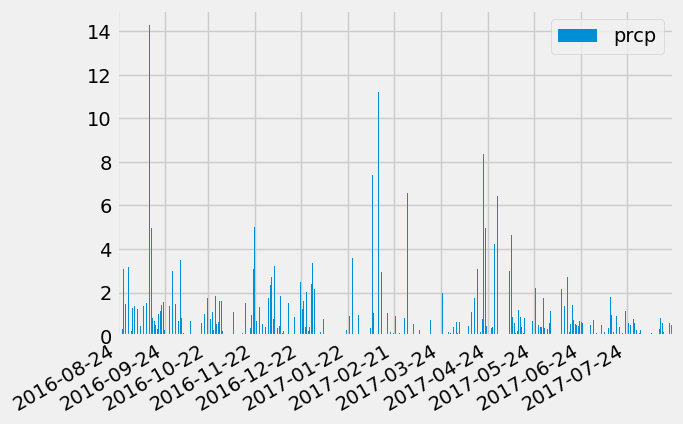

In [84]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, func.sum(Measurement.prcp)).filter(Measurement.date > (year_ago)).order_by(Measurement.date.desc()).group_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns = ['date', 'prcp'])
precip_df.set_index('date', inplace=True)

# Sort the dataframe by date
precip_df = precip_df.sort_values('date')
precip_df.index = pd.to_datetime(precip_df.index).date


# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot.bar()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.show()






In [63]:
precip_df.head()

,prcp
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10


In [73]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()


,prcp
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [78]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(func.count(Station.id)).all()
print(number_of_stations)

[(9,)]


In [97]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
all_stations_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()


# List the stations and the counts in descending order.
for x in all_stations_count:
    print(x)

print(most_active[0])

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
USC00519281


In [96]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_summary = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.round(func.avg(Measurement.tobs), 2)).filter(Measurement.station == most_active[0]).all()
for x in active_summary:
    print(active_summary)

[('USC00519281', 54.0, 85.0, 71.66)]


In [100]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active[0]).filter(Measurement.date > year_ago).order_by(Measurement.date.desc()).all()
# for x in last_year_tobs:
#     print(x)
last_year_df = pd.DataFrame(last_year_tobs, columns = ['date', 'temperature'])


Text(0, 0.5, 'Frequency')

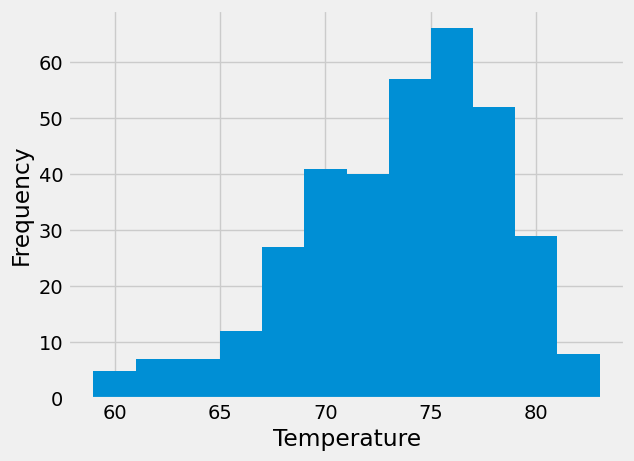

In [102]:
ax = plt.hist(last_year_df['temperature'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close session

In [103]:
# Close Session
session.close()